In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats

In [2]:
df2 = pd.read_csv("한국_방문_선택_시_고려요인.csv", encoding='cp949')
df2

,통계분류(1),통계분류(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11,2021.12,2021.13
0,통계분류(1),통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
1,전체,소계,1398,20.1,12.7,11.4,4,3.9,1.5,1.4,1.4,1.1,0.7,0.6,0.4,41
2,월별,1월,117,18.8,16.2,11.1,10.3,1.7,0,0,3.4,0,0.9,0,0,37.6
3,월별,2월,90,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0,0,1.1,0,34.4
4,월별,3월,54,20.4,14.8,13,5.6,5.6,0,1.9,0,0,1.9,0,0,37
5,월별,4월,86,19.8,12.8,17.4,5.8,0,1.2,3.5,0,0,1.2,0,0,38.4
6,월별,5월,102,17.6,8.8,14.7,13.7,4.9,2,2,0,1,0,1,0,34.3
7,월별,6월,64,20.3,7.8,10.9,6.3,1.6,0,4.7,1.6,0,0,0,0,46.9
8,월별,7월,65,18.5,13.8,13.8,0,3.1,0,3.1,0,1.5,0,1.5,0,44.6
9,월별,8월,116,10.3,10.3,6.9,0,5.2,1.7,0,0,0,0.9,0,0,64.7


In [3]:
df2.rename(columns = {"2021":"사례수","2021.1":"음식/미식탐방", "2021.2":"쇼핑", "2021.3":"자연 풍경 감상", "2021.4":"패션 유행 등 세련된 현대 문화 체험",
                       "2021.5":"역사/문화유적/전통문화 체험", "2021.6":"유흥/놀이 시설 체험", "2021.7":"치료 및 미용 서비스 체험", 
                       "2021.8":"여행 가능한 여가시간", "2021.9":"K-POP/한류스타 관련 공연팬미팅촬영지 등 체험", 
                       "2021.10":"레저 및 스포츠 활동", "2021.11":"자국과의 이동거리", "2021.12":"경제적인 여행비용","2021.13":"기타"}, inplace=True)
df2

,통계분류(1),통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,통계분류(1),통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
1,전체,소계,1398,20.1,12.7,11.4,4,3.9,1.5,1.4,1.4,1.1,0.7,0.6,0.4,41
2,월별,1월,117,18.8,16.2,11.1,10.3,1.7,0,0,3.4,0,0.9,0,0,37.6
3,월별,2월,90,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0,0,1.1,0,34.4
4,월별,3월,54,20.4,14.8,13,5.6,5.6,0,1.9,0,0,1.9,0,0,37
5,월별,4월,86,19.8,12.8,17.4,5.8,0,1.2,3.5,0,0,1.2,0,0,38.4
6,월별,5월,102,17.6,8.8,14.7,13.7,4.9,2,2,0,1,0,1,0,34.3
7,월별,6월,64,20.3,7.8,10.9,6.3,1.6,0,4.7,1.6,0,0,0,0,46.9
8,월별,7월,65,18.5,13.8,13.8,0,3.1,0,3.1,0,1.5,0,1.5,0,44.6
9,월별,8월,116,10.3,10.3,6.9,0,5.2,1.7,0,0,0,0.9,0,0,64.7


In [4]:
data_month = df2.iloc[2:14:,1:]
data_month

,통계분류(2),사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
2,1월,117,18.8,16.2,11.1,10.3,1.7,0,0,3.4,0,0.9,0,0,37.6
3,2월,90,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0,0,1.1,0,34.4
4,3월,54,20.4,14.8,13,5.6,5.6,0,1.9,0,0,1.9,0,0,37
5,4월,86,19.8,12.8,17.4,5.8,0,1.2,3.5,0,0,1.2,0,0,38.4
6,5월,102,17.6,8.8,14.7,13.7,4.9,2,2,0,1,0,1,0,34.3
7,6월,64,20.3,7.8,10.9,6.3,1.6,0,4.7,1.6,0,0,0,0,46.9
8,7월,65,18.5,13.8,13.8,0,3.1,0,3.1,0,1.5,0,1.5,0,44.6
9,8월,116,10.3,10.3,6.9,0,5.2,1.7,0,0,0,0.9,0,0,64.7
10,9월,157,13.4,13.4,8.3,1.9,3.2,1.9,1.9,1.3,0,0,0.6,0.6,53.5
11,10월,156,14.7,9.6,10.9,2.6,5.1,1.9,0,1.3,0,0.6,0.6,1.3,51.3


In [5]:
data_month.rename(columns = {"통계분류(2)":"월별"}, inplace=True)
data_month

,월별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
2,1월,117,18.8,16.2,11.1,10.3,1.7,0,0,3.4,0,0.9,0,0,37.6
3,2월,90,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0,0,1.1,0,34.4
4,3월,54,20.4,14.8,13,5.6,5.6,0,1.9,0,0,1.9,0,0,37
5,4월,86,19.8,12.8,17.4,5.8,0,1.2,3.5,0,0,1.2,0,0,38.4
6,5월,102,17.6,8.8,14.7,13.7,4.9,2,2,0,1,0,1,0,34.3
7,6월,64,20.3,7.8,10.9,6.3,1.6,0,4.7,1.6,0,0,0,0,46.9
8,7월,65,18.5,13.8,13.8,0,3.1,0,3.1,0,1.5,0,1.5,0,44.6
9,8월,116,10.3,10.3,6.9,0,5.2,1.7,0,0,0,0.9,0,0,64.7
10,9월,157,13.4,13.4,8.3,1.9,3.2,1.9,1.9,1.3,0,0,0.6,0.6,53.5
11,10월,156,14.7,9.6,10.9,2.6,5.1,1.9,0,1.3,0,0.6,0.6,1.3,51.3


In [6]:
data_month.set_index('월별',inplace=True)
data_month = data_month.astype('float')   
data_month.reset_index(inplace=True)
data_month

,월별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,1월,117.0,18.8,16.2,11.1,10.3,1.7,0.0,0.0,3.4,0.0,0.9,0.0,0.0,37.6
1,2월,90.0,22.2,15.6,12.2,3.3,4.4,2.2,2.2,2.2,0.0,0.0,1.1,0.0,34.4
2,3월,54.0,20.4,14.8,13.0,5.6,5.6,0.0,1.9,0.0,0.0,1.9,0.0,0.0,37.0
3,4월,86.0,19.8,12.8,17.4,5.8,0.0,1.2,3.5,0.0,0.0,1.2,0.0,0.0,38.4
4,5월,102.0,17.6,8.8,14.7,13.7,4.9,2.0,2.0,0.0,1.0,0.0,1.0,0.0,34.3
5,6월,64.0,20.3,7.8,10.9,6.3,1.6,0.0,4.7,1.6,0.0,0.0,0.0,0.0,46.9
6,7월,65.0,18.5,13.8,13.8,0.0,3.1,0.0,3.1,0.0,1.5,0.0,1.5,0.0,44.6
7,8월,116.0,10.3,10.3,6.9,0.0,5.2,1.7,0.0,0.0,0.0,0.9,0.0,0.0,64.7
8,9월,157.0,13.4,13.4,8.3,1.9,3.2,1.9,1.9,1.3,0.0,0.0,0.6,0.6,53.5
9,10월,156.0,14.7,9.6,10.9,2.6,5.1,1.9,0.0,1.3,0.0,0.6,0.6,1.3,51.3


In [7]:
data_month_copy = data_month.copy()
data_month_copy['음식/미식탐방'] = data_month_copy['사례수']*data_month_copy['음식/미식탐방']/100
data_month_copy['쇼핑'] = data_month_copy['사례수']*data_month_copy['쇼핑']/100
data_month_copy['자연 풍경 감상'] = data_month_copy['사례수']*data_month_copy['자연 풍경 감상']/100
data_month_copy['패션 유행 등 세련된 현대 문화 체험'] = data_month_copy['사례수']*data_month_copy['패션 유행 등 세련된 현대 문화 체험']/100
data_month_copy['역사/문화유적/전통문화 체험'] = data_month_copy['사례수']*data_month_copy['역사/문화유적/전통문화 체험']/100
data_month_copy['유흥/놀이 시설 체험'] = data_month_copy['사례수']*data_month_copy['유흥/놀이 시설 체험']/100
data_month_copy['치료 및 미용 서비스 체험'] = data_month_copy['사례수']*data_month_copy['치료 및 미용 서비스 체험']/100
data_month_copy['여행 가능한 여가시간'] = data_month_copy['사례수']*data_month_copy['여행 가능한 여가시간']/100
data_month_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험'] = data_month_copy['사례수']*data_month_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험']/100
data_month_copy['레저 및 스포츠 활동'] = data_month_copy['사례수']*data_month_copy['레저 및 스포츠 활동']/100
data_month_copy['자국과의 이동거리'] = data_month_copy['사례수']*data_month_copy['자국과의 이동거리']/100
data_month_copy['경제적인 여행비용'] = data_month_copy['사례수']*data_month_copy['경제적인 여행비용']/100
data_month_copy['기타'] = data_month_copy['사례수']*data_month_copy['기타']/100
data_month_copy

,월별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,1월,117.0,21.996,18.954,12.987,12.051,1.989,0.000,0.000,3.978,0.000,1.053,0.000,0.000,43.992
1,2월,90.0,19.980,14.040,10.980,2.970,3.960,1.980,1.980,1.980,0.000,0.000,0.990,0.000,30.960
2,3월,54.0,11.016,7.992,7.020,3.024,3.024,0.000,1.026,0.000,0.000,1.026,0.000,0.000,19.980
3,4월,86.0,17.028,11.008,14.964,4.988,0.000,1.032,3.010,0.000,0.000,1.032,0.000,0.000,33.024
4,5월,102.0,17.952,8.976,14.994,13.974,4.998,2.040,2.040,0.000,1.020,0.000,1.020,0.000,34.986
5,6월,64.0,12.992,4.992,6.976,4.032,1.024,0.000,3.008,1.024,0.000,0.000,0.000,0.000,30.016
6,7월,65.0,12.025,8.970,8.970,0.000,2.015,0.000,2.015,0.000,0.975,0.000,0.975,0.000,28.990
7,8월,116.0,11.948,11.948,8.004,0.000,6.032,1.972,0.000,0.000,0.000,1.044,0.000,0.000,75.052
8,9월,157.0,21.038,21.038,13.031,2.983,5.024,2.983,2.983,2.041,0.000,0.000,0.942,0.942,83.995
9,10월,156.0,22.932,14.976,17.004,4.056,7.956,2.964,0.000,2.028,0.000,0.936,0.936,2.028,80.028


In [8]:
data_month_copy = data_month_copy.round(0)

In [9]:
data_month_copy.iloc[::,1:].astype(int)

,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,117,22,19,13,12,2,0,0,4,0,1,0,0,44
1,90,20,14,11,3,4,2,2,2,0,0,1,0,31
2,54,11,8,7,3,3,0,1,0,0,1,0,0,20
3,86,17,11,15,5,0,1,3,0,0,1,0,0,33
4,102,18,9,15,14,5,2,2,0,1,0,1,0,35
5,64,13,5,7,4,1,0,3,1,0,0,0,0,30
6,65,12,9,9,0,2,0,2,0,1,0,1,0,29
7,116,12,12,8,0,6,2,0,0,0,1,0,0,75
8,157,21,21,13,3,5,3,3,2,0,0,1,1,84
9,156,23,15,17,4,8,3,0,2,0,1,1,2,80


In [10]:
data_month_copy.set_index('월별',inplace=True)
data_month_copy = data_month_copy.astype('int')   
data_month_copy.reset_index(inplace=True)
data_month_copy

,월별,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
0,1월,117,22,19,13,12,2,0,0,4,0,1,0,0,44
1,2월,90,20,14,11,3,4,2,2,2,0,0,1,0,31
2,3월,54,11,8,7,3,3,0,1,0,0,1,0,0,20
3,4월,86,17,11,15,5,0,1,3,0,0,1,0,0,33
4,5월,102,18,9,15,14,5,2,2,0,1,0,1,0,35
5,6월,64,13,5,7,4,1,0,3,1,0,0,0,0,30
6,7월,65,12,9,9,0,2,0,2,0,1,0,1,0,29
7,8월,116,12,12,8,0,6,2,0,0,0,1,0,0,75
8,9월,157,21,21,13,3,5,3,3,2,0,0,1,1,84
9,10월,156,23,15,17,4,8,3,0,2,0,1,1,2,80


In [11]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family'] = 'NanumGothic'

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\LG\.matplotlib


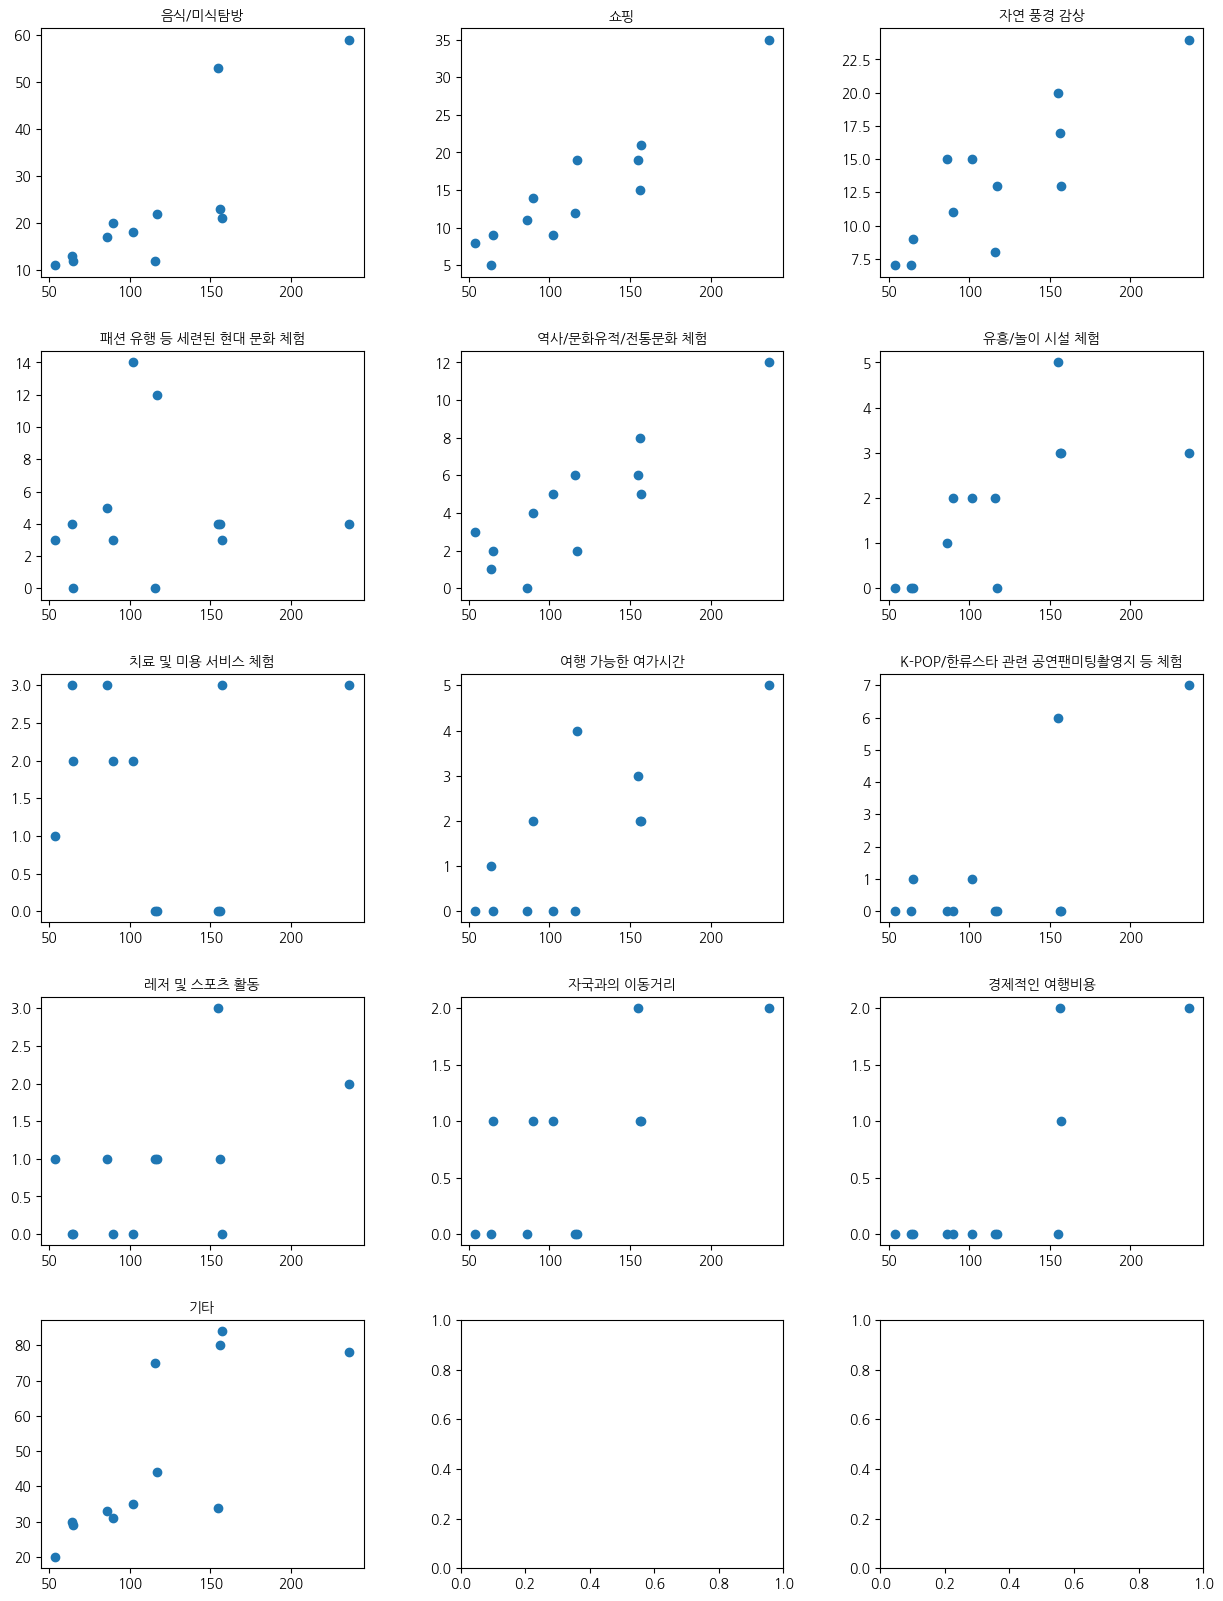

In [16]:
f, axes = plt.subplots(5, 3)
f.set_size_inches((15, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

axes[0, 0].set_title('음식/미식탐방', fontsize = 10)
axes[0, 0].scatter(x="사례수", y="음식/미식탐방", data=data_month_copy)

axes[0, 1].set_title('쇼핑', fontsize = 10)
axes[0, 1].scatter(x="사례수", y="쇼핑", data=data_month_copy)

axes[0, 2].set_title('자연 풍경 감상', fontsize = 10)
axes[0, 2].scatter(x="사례수", y="자연 풍경 감상", data=data_month_copy)

axes[1, 0].set_title('패션 유행 등 세련된 현대 문화 체험', fontsize = 10)
axes[1, 0].scatter(x="사례수", y="패션 유행 등 세련된 현대 문화 체험", data=data_month_copy)

axes[1, 1].set_title('역사/문화유적/전통문화 체험', fontsize = 10)
axes[1, 1].scatter(x="사례수", y="역사/문화유적/전통문화 체험", data=data_month_copy)

axes[1, 2].set_title('유흥/놀이 시설 체험', fontsize = 10)
axes[1, 2].scatter(x="사례수", y="유흥/놀이 시설 체험", data=data_month_copy)

axes[2, 0].set_title('치료 및 미용 서비스 체험', fontsize = 10)
axes[2, 0].scatter(x="사례수", y="치료 및 미용 서비스 체험", data=data_month_copy)

axes[2, 1].set_title('여행 가능한 여가시간', fontsize = 10)
axes[2, 1].scatter(x="사례수", y="여행 가능한 여가시간", data=data_month_copy)

axes[2, 2].set_title('K-POP/한류스타 관련 공연팬미팅촬영지 등 체험', fontsize = 10)
axes[2, 2].scatter(x="사례수", y="K-POP/한류스타 관련 공연팬미팅촬영지 등 체험", data=data_month_copy)

axes[3, 0].set_title('레저 및 스포츠 활동', fontsize = 10)
axes[3, 0].scatter(x="사례수", y="레저 및 스포츠 활동", data=data_month_copy)

axes[3, 1].set_title('자국과의 이동거리', fontsize = 10)
axes[3, 1].scatter(x="사례수", y="자국과의 이동거리", data=data_month_copy)

axes[3, 2].set_title('경제적인 여행비용', fontsize = 10)
axes[3, 2].scatter(x="사례수", y="경제적인 여행비용", data=data_month_copy)

axes[4, 0].set_title('기타', fontsize = 10)
axes[4, 0].scatter(x="사례수", y="기타", data=data_month_copy)
plt.show()

In [15]:
# '음식/미식탐방', '쇼핑', '자연 풍경 감상', '역사/문화유적/전통문화 체험', '유흥/놀이 시설 체험', '여행 가능한 여가시간', '기타'
# scatter plot을 분포 확인 -> column에서 양적 상관관계를 보임. 

In [12]:
cormat = data_month_copy.corr()
round(cormat,2)

,사례수,음식/미식탐방,쇼핑,자연 풍경 감상,패션 유행 등 세련된 현대 문화 체험,역사/문화유적/전통문화 체험,유흥/놀이 시설 체험,치료 및 미용 서비스 체험,여행 가능한 여가시간,K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,레저 및 스포츠 활동,자국과의 이동거리,경제적인 여행비용,기타
사례수,1.00,0.83,0.93,0.85,0.04,0.87,0.73,-0.02,0.77,0.70,0.56,0.70,0.79,0.76
음식/미식탐방,0.83,1.00,0.83,0.89,0.05,0.70,0.71,-0.02,0.79,0.94,0.78,0.82,0.49,0.29
쇼핑,0.93,0.83,1.00,0.79,0.02,0.75,0.56,0.07,0.87,0.71,0.54,0.65,0.67,0.62
자연 풍경 감상,0.85,0.89,0.79,1.00,0.26,0.68,0.71,0.03,0.69,0.78,0.65,0.77,0.62,0.40
패션 유행 등 세련된 현대 문화 체험,0.04,0.05,0.02,0.26,1.00,-0.09,-0.08,-0.06,0.19,-0.03,-0.06,-0.06,-0.12,-0.18
역사/문화유적/전통문화 체험,0.87,0.70,0.75,0.68,-0.09,1.00,0.69,-0.14,0.56,0.65,0.47,0.71,0.78,0.69
유흥/놀이 시설 체험,0.73,0.71,0.56,0.71,-0.08,0.69,1.00,-0.18,0.42,0.61,0.57,0.77,0.45,0.49
치료 및 미용 서비스 체험,-0.02,-0.02,0.07,0.03,-0.06,-0.14,-0.18,1.00,-0.08,0.03,-0.43,0.07,0.09,-0.06
여행 가능한 여가시간,0.77,0.79,0.87,0.69,0.19,0.56,0.42,-0.08,1.00,0.62,0.51,0.54,0.54,0.40
K-POP/한류스타 관련 공연팬미팅촬영지 등 체험,0.70,0.94,0.71,0.78,-0.03,0.65,0.61,0.03,0.62,1.00,0.76,0.81,0.36,0.15


C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


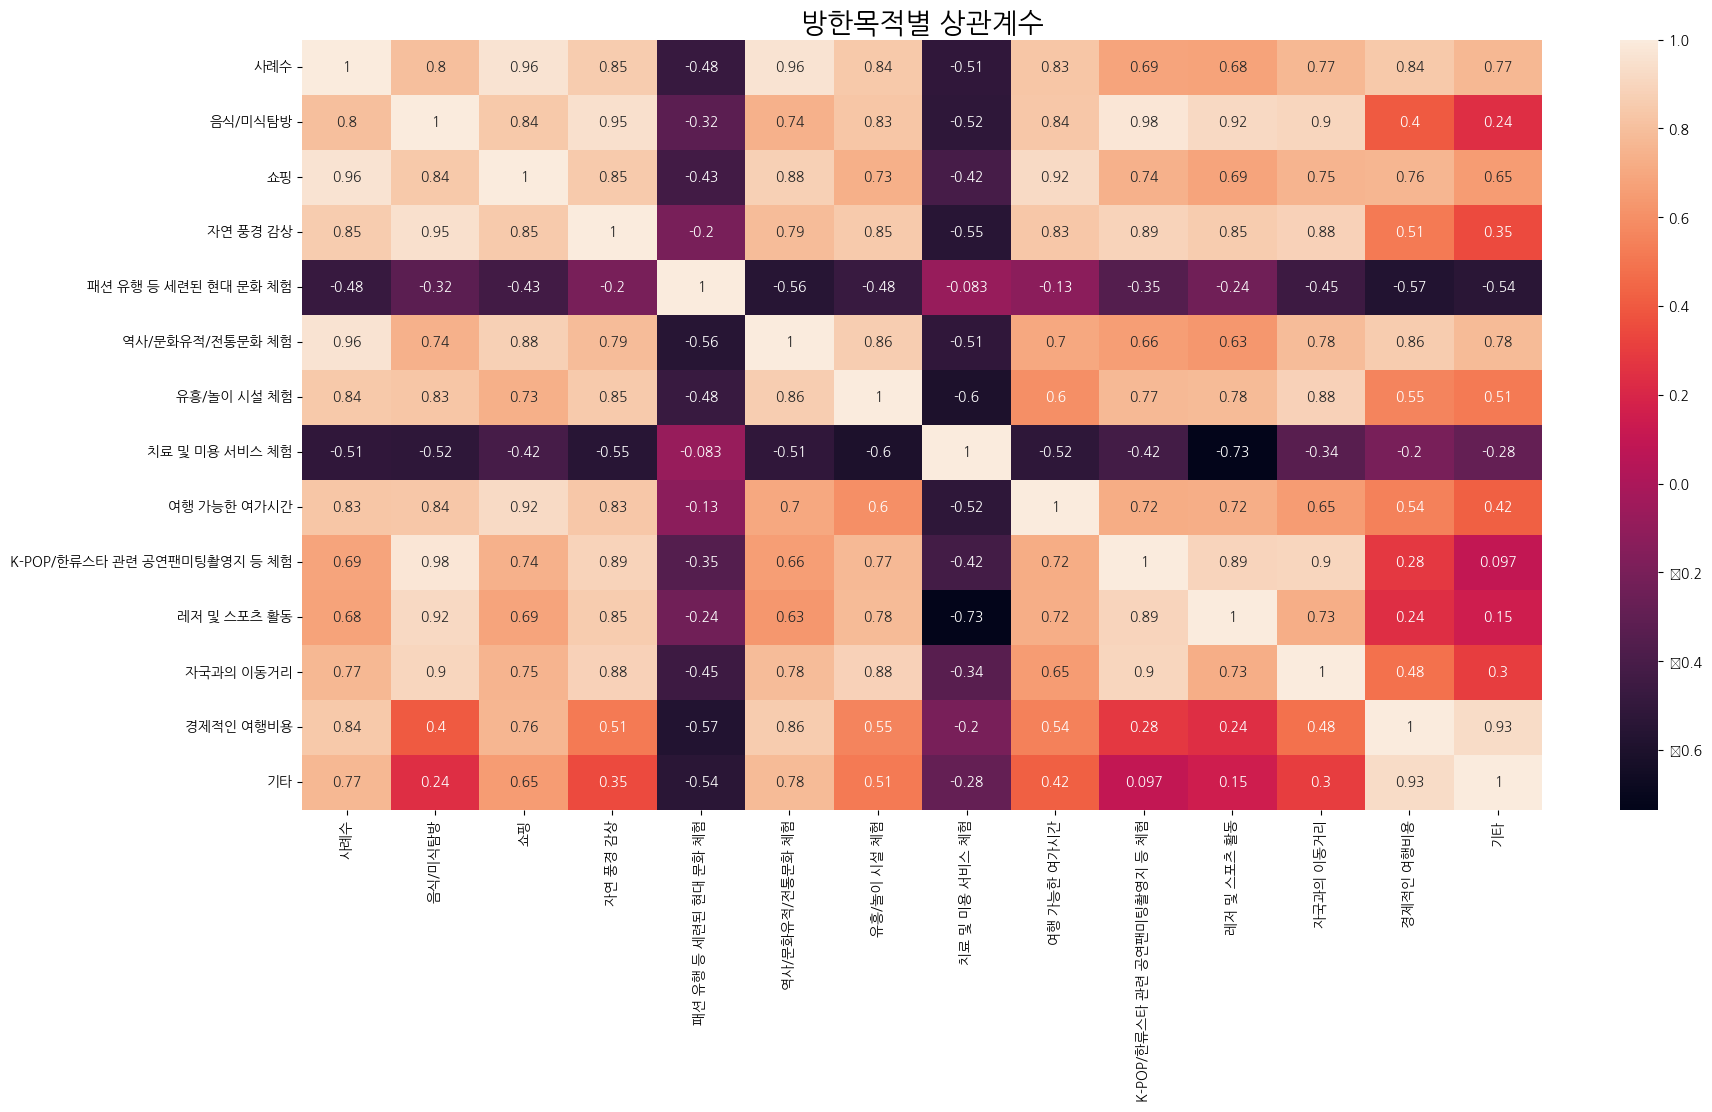

In [13]:
plt.figure(figsize=(20,10))
plt.title("방한목적별 상관계수", size = 20)
sns.heatmap(cormat.corr(),annot=True)
plt.show()

# 방한목적별 column들을 사례수와의 상관계수를 보기위해 heatmap 진행
# '패션 유행 등 세련된 현대 문화 체험'과 '치료 및 미용 서비스 체험'를 제외한 column에서 양적 상관관계를 보임을 알 수 있다. 
# scatter 분포에서 양적 상관관계 보였던 column이 양적 상관계수를 나타낸 것을 볼 수 있다. 

In [16]:
# 한국문화에 대한 대중적 인기비율(선호도)을 조사한 결과 콘텐츠 중 상위 4가지 택함. '한식 > 뷰티 > 음악 > 패션' 순으로 높게 나옴. 
# 소비비중 분석에서도 한국 콘텐츠에 대한 비중이 높음을 알 수 있었다. 
# 선호도 조사와 소비비중 분석 결과를 통해 k-콘텐츠가 방한목적과 관련이 있는지에 대한 상관분석 진행 

# 한국방문시 고려요인 data에서 K-콘텐츠와 관련된 column 중 scatter plot 결과 양적 상관관계를 보였던 
#'음식/미식탐방', '쇼핑', 'K-POP/한류스타 관련 공연팬미팅촬영지 등 체험' column으로 회귀분석 진행 

In [17]:
data_month_copy.rename(columns = {'음식':'음식/미식탐방'}, inplace=True)

import statsmodels.api as sm
X_const = sm.add_constant(data_month_copy['사례수'])
print(X_const)
model2 = sm.OLS(data_month_copy['음식/미식탐방'], X_const).fit()
model2.params

    const  사례수
0     1.0  117
1     1.0   90
2     1.0   54
3     1.0   86
4     1.0  102
5     1.0   64
6     1.0   65
7     1.0  116
8     1.0  157
9     1.0  156
10    1.0  236
11    1.0  155


const   -5.813729
사례수      0.250905
dtype: float64

In [18]:
print(model2.summary())

#회귀분석 모델이 적합한지를 보았을 때, 사례수가 음식/미식탐방을 68%정도 설명해주고 있다
#p값이 0.000843로 0.05보다 작으므로 우연히 일어난 것이 아닌 둘 사이에 association이 있음을 알 수 있다.
#x가 증가함에 따라 y가 0.25% 증가한다고 예측. 

                            OLS Regression Results                            
Dep. Variable:                음식/미식탐방   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     22.08
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           0.000843
Time:                        10:58:13   Log-Likelihood:                -42.650
No. Observations:                  12   AIC:                             89.30
Df Residuals:                      10   BIC:                             90.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8137      6.771     -0.859      0.4

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


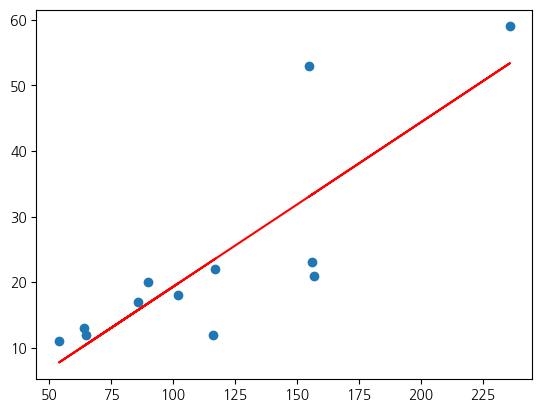

In [23]:
x = data_month_copy['사례수']
y = data_month_copy['음식/미식탐방']
plt.scatter(x, y)
plt.plot(x, -5.8137 +  0.2509*x, 'r')

# 결과로 나온 const와 사례수의 coefficientf를 이용해서 선형식을 통한 그래프를 그려봄. 
# 선형적인 상관관계를 볼 수 있다. 

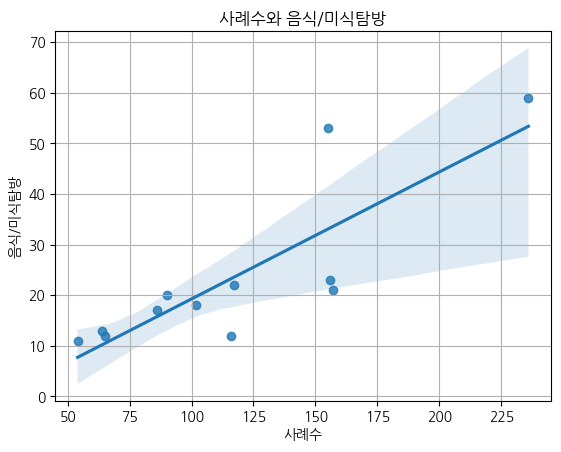

In [17]:
sns.regplot(x="사례수", y='음식/미식탐방', data=data_month_copy)
plt.title('사례수와 음식/미식탐방')
plt.grid()
plt.show()

In [24]:
yy = np.log(data_month_copy['음식/미식탐방'])

X_const = sm.add_constant(x)
print(X_const)
model2 = sm.OLS(yy, X_const).fit()
print(model2.summary())

# 정확도를 높이기 위해 '음식/미식탐방'에 log를 취함. 
# 정확도가 68%에서 73%로 증가함을 알 수 있다. 

    const  사례수
0     1.0  117
1     1.0   90
2     1.0   54
3     1.0   86
4     1.0  102
5     1.0   64
6     1.0   65
7     1.0  116
8     1.0  157
9     1.0  156
10    1.0  236
11    1.0  155
                            OLS Regression Results                            
Dep. Variable:                음식/미식탐방   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     26.97
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           0.000405
Time:                        11:00:44   Log-Likelihood:                -1.3516
No. Observations:                  12   AIC:                             6.703
Df Residuals:                      10   BIC:                             7.673
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
               

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


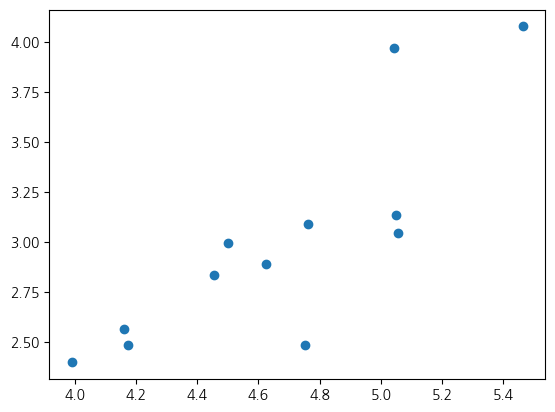

In [41]:
x = xx
y = yy
plt.scatter(x, y)

#산점도 분포를 통해서 선형적 관계가 있음을 볼 수 있다. 

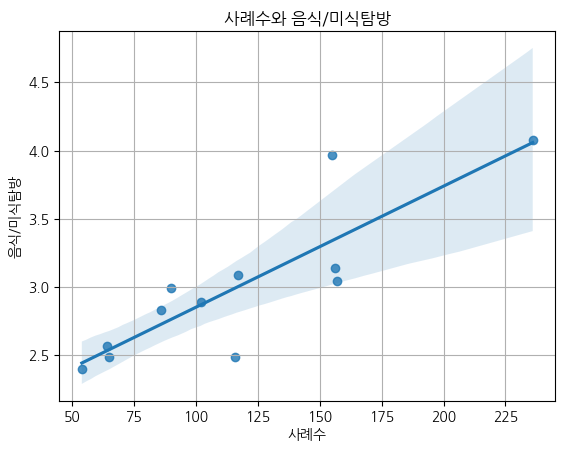

In [26]:
sns.regplot(x="사례수", y=yy, data=data_month_copy)
plt.title('사례수와 음식/미식탐방')
plt.grid()
plt.show()

In [20]:
print(stats.spearmanr(data_month_copy['사례수'], data_month_copy['음식/미식탐방']))

#0.85로 1에 가까운 값을 가지며 강한 양적 상관관계를 보임을 알 수 있다. 
#따라서 사례수가 증가함에 따라 '음식/미식탐방'이 증가함을 알 수 있다. 

SpearmanrResult(correlation=0.847637026689399, pvalue=0.0004977973794360491)


In [ ]:
# 사례수와 쇼핑 

In [21]:
import statsmodels.api as sm
X_const = sm.add_constant(data_month_copy['사례수'])
print(X_const)
model2 = sm.OLS(data_month_copy['쇼핑'], X_const).fit()
model2.params

    const  사례수
0     1.0  117
1     1.0   90
2     1.0   54
3     1.0   86
4     1.0  102
5     1.0   64
6     1.0   65
7     1.0  116
8     1.0  157
9     1.0  156
10    1.0  236
11    1.0  155


const   -1.871585
사례수      0.142675
dtype: float64

In [22]:
print(model2.summary())

#회귀분석 모델이 적합한지를 보았을 때, 사례수가 쇼핑을 86%정도 설명해주고 있다
#p값이 1.49e-05로 0.05보다 작으므로 우연히 일어난 것이 아닌 둘 사이에 association이 있음을 알 수 있다. 

                            OLS Regression Results                            
Dep. Variable:                     쇼핑   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     60.64
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           1.49e-05
Time:                        01:07:48   Log-Likelihood:                -29.815
No. Observations:                  12   AIC:                             63.63
Df Residuals:                      10   BIC:                             64.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8716      2.323     -0.806      0.4

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


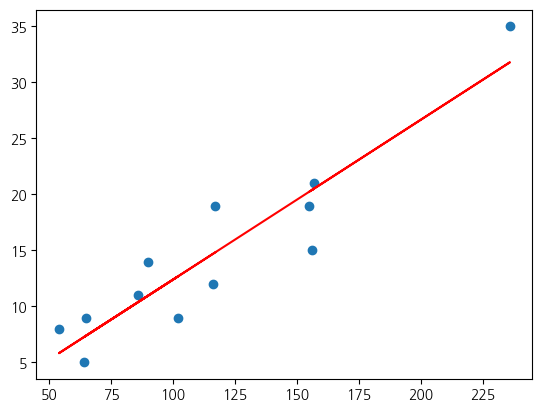

In [135]:
x = data_month_copy['사례수']
y = data_month_copy['쇼핑']
plt.scatter(x, y)
plt.plot(x, -1.8716 +   0.1427*x, 'r')

# 결과로 나온 const와 사례수의 coefficientf를 이용해서 선형식을 통한 그래프를 그려봄. 
# 선형적인 상관관계를 볼 수 있다. 
# 직선에 까가운 분포를 보임을 알 수 있다. 

In [23]:
print(stats.spearmanr(data_month_copy['사례수'], data_month_copy['쇼핑']))

#Spearman Correlation을 통해서도 0.93으로 강한 양적 상관관계가 있음을 알 수 있다. 
# 사례수가 증가함에 따라 쇼핑이 증가함을 알 수 있다. 

SpearmanrResult(correlation=0.9263214916857051, pvalue=1.5096060987057456e-05)


In [115]:
# 사례수와 K-POP/한류스타 관련 공연팬미팅촬영지 등 체험

In [24]:
import statsmodels.api as sm
X_const = sm.add_constant(data_month_copy['사례수'])
print(X_const)
model2 = sm.OLS(data_month_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험'], X_const).fit()
model2.params

    const  사례수
0     1.0  117
1     1.0   90
2     1.0   54
3     1.0   86
4     1.0  102
5     1.0   64
6     1.0   65
7     1.0  116
8     1.0  157
9     1.0  156
10    1.0  236
11    1.0  155


const   -2.623535
사례수      0.033249
dtype: float64

In [25]:
print(model2.summary())

#회귀분석 모델이 적합한지를 보았을 때, 사례수가 K-POP/한류스타 관련 공연팬미팅촬영지 등 체험을 44%정도 설명해주고 있다
#p값이 0.0115로 0.05보다 작으므로 우연히 일어난 것이 아닌 둘 사이에 association이 있음을 알 수 있다. 

                                 OLS Regression Results                                
Dep. Variable:     K-POP/한류스타 관련 공연팬미팅촬영지 등 체험   R-squared:                       0.488
Model:                                     OLS   Adj. R-squared:                  0.437
Method:                          Least Squares   F-statistic:                     9.527
Date:                         Wed, 30 Nov 2022   Prob (F-statistic):             0.0115
Time:                                 01:11:28   Log-Likelihood:                -23.441
No. Observations:                           12   AIC:                             50.88
Df Residuals:                               10   BIC:                             51.85
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


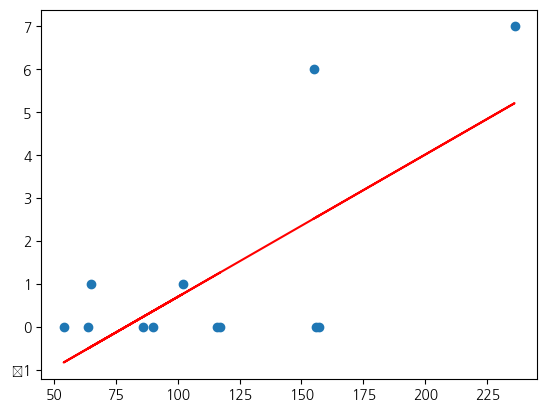

In [26]:
x = data_month_copy['사례수']
y = data_month_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험']
plt.scatter(x, y)
plt.plot(x, -2.6235 +   0.0332*x, 'r')

# 결과로 나온 const와 사례수의 coefficientf를 이용해서 선형식을 통한 그래프를 그려봄. 
# 선형적인 상관관계를 나타냄

In [27]:
# 사례수와  K-POP/한류스타 관련 공연팬미팅촬영지 등 체험 사이에 양적 상관관계를 보이고 liner model이 높은 percent로 나타내고 있다. 
# 하지만 분포 그래프에서 약간씩 벗어나 outlier로 생각될 수 있는 값을 볼 수 있다. 
# 데이터의 양이 작아 전처리를 하거나 값이 작아 로그를 취하기 어렵다고 생각해 Spearman Correlation을 이용해 상관관계를 확인함.  

print(stats.spearmanr(data_month_copy['사례수'], data_month_copy['K-POP/한류스타 관련 공연팬미팅촬영지 등 체험']))
#Spearman Correlation이 0.31로 상관관계를 보임을 알 수 있다. 
#사례수가 증가함에 따라 K-POP/한류스타 관련 공연팬미팅촬영지 등 체험이 증가한다고 할 수 있다. 

SpearmanrResult(correlation=0.31280970458530716, pvalue=0.32218826915262155)


In [122]:
# K-콘텐츠로 분류한 column에 대한 회귀분석을 해봤다. 
# K-콘텐츠로 분류한 column을 제외하고 scatter plot에서 높은 상관관계를 보이기도 했고 상관계수가 높게 나온 
# '자연 풍경 감상'과 '역사/문화유적/전통문화 체험' column에 대한 회귀분석 추가로 진행 

In [123]:
# 사례수와 자연 풍경 감상

In [28]:
import statsmodels.api as sm
X_const = sm.add_constant(data_month_copy['사례수'])
print(X_const)
model2 = sm.OLS(data_month_copy['자연 풍경 감상'], X_const).fit()
model2.params

    const  사례수
0     1.0  117
1     1.0   90
2     1.0   54
3     1.0   86
4     1.0  102
5     1.0   64
6     1.0   65
7     1.0  116
8     1.0  157
9     1.0  156
10    1.0  236
11    1.0  155


const    3.180356
사례수      0.086435
dtype: float64

In [29]:
print(model2.summary())

#회귀분석 모델이 적합한지를 보았을 때, 사례수가 자연 풍경 감상을 70%정도 설명해주고 있다
#p값이 0.000439로 0.05보다 작으므로 우연히 일어난 것이 아닌 둘 사이에 association이 있음을 알 수 있다. 

                            OLS Regression Results                            
Dep. Variable:               자연 풍경 감상   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     26.41
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           0.000439
Time:                        01:16:18   Log-Likelihood:                -28.789
No. Observations:                  12   AIC:                             61.58
Df Residuals:                      10   BIC:                             62.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1804      2.133      1.491      0.1

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


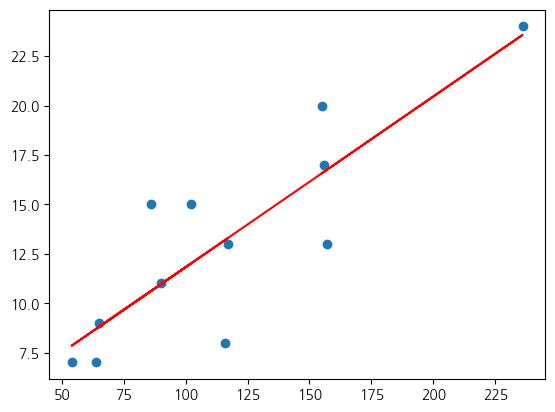

In [30]:
x = data_month_copy['사례수']
y = data_month_copy['자연 풍경 감상']
plt.scatter(x, y)
plt.plot(x, 3.1804 +  0.0864*x, 'r')

# 결과로 나온 const와 사례수의 coefficientf를 이용해서 선형식을 통한 그래프를 그려봄. 
# 선형적인 상관관계를 보인다. 

In [31]:
print(stats.spearmanr(data_month_copy['사례수'], data_month_copy['자연 풍경 감상']))
#Spearman Correlation이 0.75로 강한 상관관계를 보임을 알 수 있다. 
# 사례수가 증가함에 따라 자연 풍경 감상이 증가함을 알 수 있다. 

SpearmanrResult(correlation=0.752207291663717, pvalue=0.0047685436908363665)


In [128]:
# 사례수와 역사/문화유적/전통문화 체험

In [32]:
import statsmodels.api as sm
X_const = sm.add_constant(data_month_copy['사례수'])
print(X_const)
model2 = sm.OLS(data_month_copy['역사/문화유적/전통문화 체험'], X_const).fit()
model2.params

    const  사례수
0     1.0  117
1     1.0   90
2     1.0   54
3     1.0   86
4     1.0  102
5     1.0   64
6     1.0   65
7     1.0  116
8     1.0  157
9     1.0  156
10    1.0  236
11    1.0  155


const   -1.920438
사례수      0.055111
dtype: float64

In [33]:
print(model2.summary())

#회귀분석 모델이 적합한지를 보았을 때, 사례수가 역사/문화유적/전통문화 체험을 73%정도 설명해주고 있다
#p값이 0.000238로 0.05보다 작으므로 우연히 일어난 것이 아닌 둘 사이에 association이 있음을 알 수 있다. 

                            OLS Regression Results                            
Dep. Variable:        역사/문화유적/전통문화 체험   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     31.00
Date:                Wed, 30 Nov 2022   Prob (F-statistic):           0.000238
Time:                        01:22:12   Log-Likelihood:                -22.427
No. Observations:                  12   AIC:                             48.85
Df Residuals:                      10   BIC:                             49.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9204      1.255     -1.530      0.1

C:\Users\LG\anaconda3\envs\stat2\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


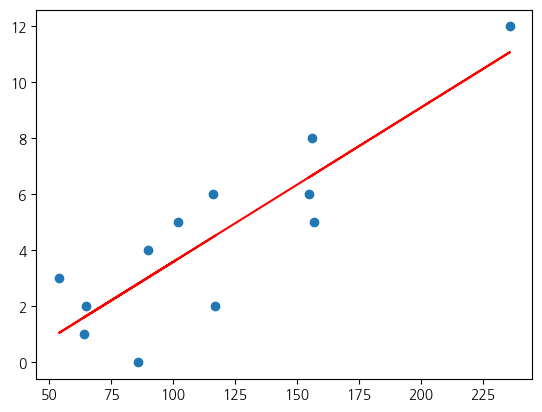

In [34]:
x = data_month_copy['사례수']
y = data_month_copy['역사/문화유적/전통문화 체험']
plt.scatter(x, y)
plt.plot(x, -1.9204 +  0.0551*x, 'r')

# 결과로 나온 const와 사례수의 coefficientf를 이용해서 선형식을 통한 그래프를 그려봄. 
# 선형적인 상관관계를 보이고 선에 가까운 분포를 보임. 

In [35]:
print(stats.spearmanr(data_month_copy['사례수'], data_month_copy['역사/문화유적/전통문화 체험']))
#Spearman Correlation이 0.76으로 강한 상관관계를 보임을 알 수 있다. 
# 사례수가 증가함에 따라 역사/문화유적/전통문화 체험이 증가함을 알 수 있다. 

SpearmanrResult(correlation=0.7592372663521628, pvalue=0.004183039988557089)


In [ ]:
# 소비비중과 선호도 조사를 바탕으로 K-콘텐츠와 관련된 방한목적이 사례수와 양적 상관관계를 보임을 알 수 있었다. 